# 시계열 데이터 탐색

## 시간 조작

In [1]:
import pandas as pd

### # 시간 유형 데이터 만들기

In [2]:
dates = ["2020-01-01", "2020-03-01", "2021-09-01"]

dates

['2020-01-01', '2020-03-01', '2021-09-01']

### # 날짜 타입으로 변환(형변환)

In [5]:
ts_dates = pd.to_datetime(dates)

ts_dates

DatetimeIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='datetime64[ns]', freq=None)

In [6]:
ts_dates[0]

Timestamp('2020-01-01 00:00:00')

In [7]:
type(ts_dates)

pandas.core.indexes.datetimes.DatetimeIndex

### # 년월일 단위로 추출

In [10]:
pr_day = ts_dates.to_period(freq = "D")

pr_day

PeriodIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='period[D]')

### # 년월 단위로 추출

In [14]:
pr_month = ts_dates.to_period(freq = "M")

pr_month

PeriodIndex(['2020-01', '2020-03', '2021-09'], dtype='period[M]')

### # 년 단위로 추출

In [15]:
pr_year = ts_dates.to_period(freq = "Y")

pr_year

PeriodIndex(['2020', '2020', '2021'], dtype='period[A-DEC]')

### # 타임스탬프

In [16]:
# timeseries.csv 파일 불러오기

# 파일 경로 지정
file_path = "./data/timeseries.csv"

# 파일을 읽어 들여서 DataFrame 형태로 읽어드리기
df= pd.read_csv(file_path)

df

,Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977
1,2016-06-29,10700,10550,10900,9990,170253
2,2017-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2019-06-26,10800,10900,11000,10700,63039


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5 non-null      object
 1   Close   5 non-null      int64 
 2   Start   5 non-null      int64 
 3   High    5 non-null      int64 
 4   Low     5 non-null      int64 
 5   Volume  5 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 368.0+ bytes


### # 문제
  * new_Date 컬럼을 새로 만든다.
  * Data 컬럼의 유형을 날짜 타입으로 변환
  * new_Data 컬럼에 삽입

In [33]:
df["new_Date"] = pd.to_datetime(df["Date"])

In [34]:
df

,Date,Close,Start,High,Low,Volume,new_Date
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5 non-null      object        
 1   Close     5 non-null      int64         
 2   Start     5 non-null      int64         
 3   High      5 non-null      int64         
 4   Low       5 non-null      int64         
 5   Volume    5 non-null      int64         
 6   new_Date  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 408.0+ bytes


### # 문제
  * new_Date 컬럼의 0번째 값을 조회
  * 0번째 값의 일반타입도 조회

In [37]:
df["new_Date"][0]

df["new_Date"].iloc[0]

df["new_Date"].loc[0]

Timestamp('2015-07-02 00:00:00')

In [36]:
type(df["new_Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

### # Date 컬럼 지우기

In [40]:
df.drop("Date", axis = 1, inplace = True)

KeyError: "['Date'] not found in axis"

In [41]:
df

,Close,Start,High,Low,Volume,new_Date
0,10100,10850,10900,10000,137977,2015-07-02
1,10700,10550,10900,9990,170253,2016-06-29
2,10400,10900,10950,10150,155769,2017-06-28
3,10900,10800,11050,10500,133548,2018-06-27
4,10800,10900,11000,10700,63039,2019-06-26


### # 시계열 기준으로 데이터프레임을 짜고 싶을 때는
  * index를 날짜 타입으로 대체하는 게 좋다.

#### * index 설정

In [42]:
df.set_index("new_Date", inplace = True)

In [43]:
df

,Close,Start,High,Low,Volume
new_Date,,,,,
2015-07-02,10100,10850,10900,10000,137977
2016-06-29,10700,10550,10900,9990,170253
2017-06-28,10400,10900,10950,10150,155769
2018-06-27,10900,10800,11050,10500,133548
2019-06-26,10800,10900,11000,10700,63039


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2015-07-02 to 2019-06-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   5 non-null      int64
 1   Start   5 non-null      int64
 2   High    5 non-null      int64
 3   Low     5 non-null      int64
 4   Volume  5 non-null      int64
dtypes: int64(5)
memory usage: 240.0 bytes


In [45]:
dates = ["2020-01-01", "2020-03-01", "2021-09-01"]

dates

['2020-01-01', '2020-03-01', '2021-09-01']

In [46]:
ts_dates = pd.to_datetime(dates)

### # 날짜 추출

In [50]:
pr_year = ts_dates.to_period(freq = "Y")

# 혹은

pr_year = ts_dates.to_period(freq = "A")

pr_year

PeriodIndex(['2020', '2020', '2021'], dtype='period[A-DEC]')

In [51]:
pr_month = ts_dates.to_period(freq = "M")

pr_month

PeriodIndex(['2020-01', '2020-03', '2021-09'], dtype='period[M]')

In [52]:
pr_day = ts_dates.to_period(freq = "D")

pr_day

PeriodIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='period[D]')

### # pd.date_range : 기간 설정
  * start : 기간의 시작 값
  * end : 기간의 끝 값
  * periods : 생성할 기간의 개수
  * freq : 시간 간격 설정
  * tz : timezone

#### * 2020년 1월 1을 시작으로, 종료 년도 없고, 6개 구간으로 나눈다. 시간 간격은 월단위. 시간대는 아시아/서울.

In [69]:
timestamp_df = pd.date_range(start = "2020-01-01", 
                             end = None, 
                             periods = 6,
                             freq = "M",
                             tz = "Asia/Seoul"
                            )

In [67]:
timestamp_df

DatetimeIndex(['2020-01-31 00:00:00+09:00', '2020-02-29 00:00:00+09:00',
               '2020-03-31 00:00:00+09:00', '2020-04-30 00:00:00+09:00',
               '2020-05-31 00:00:00+09:00', '2020-06-30 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='M')

### # period_range로 기간 설정
  * 2년 단위로 기간 설정

In [81]:
pr_y = pd.period_range(start = "2020-01-01",
                      end = None,
                      periods = 3,
                      freq = "2Y",
                      )

pr_y

PeriodIndex(['2020', '2022', '2024'], dtype='period[2A-DEC]')

  * 2개월 단위로 기간 설정

In [82]:
pr_m = pd.period_range(start = "2020-01-01",
                      end = None,
                      periods = 3,
                      freq = "2M",
                      )

pr_m

PeriodIndex(['2020-01', '2020-03', '2020-05'], dtype='period[2M]')

  * 2일 단위로 기간 설정

In [83]:
pr_d = pd.period_range(start = "2020-01-01",
                      end = None,
                      periods = 3,
                      freq = "2D",
                      )

pr_d

PeriodIndex(['2020-01-01', '2020-01-03', '2020-01-05'], dtype='period[2D]')

  * 2시간 단위로 기간 설정

In [84]:
pr_h = pd.period_range(start = "2020-01-01",
                      end = None,
                      periods = 3,
                      freq = "2H",
                      )

pr_h

PeriodIndex(['2020-01-01 00:00', '2020-01-01 02:00', '2020-01-01 04:00'], dtype='period[2H]')

  * 2분 단위로 기간 설정

In [89]:
pr_min = pd.period_range(start = "2020-01-01",
                      end = None,
                      periods = 3,
                      freq = "2MIN",
                      )

pr_min

PeriodIndex(['2020-01-01 00:00', '2020-01-01 00:02', '2020-01-01 00:04'], dtype='period[2T]')

  * 2초 단위로 기간 설정

In [90]:
pr_s = pd.period_range(start = "2020-01-01",
                      end = None,
                      periods = 3,
                      freq = "2S",
                      )

pr_s

PeriodIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:02',
             '2020-01-01 00:00:04'],
            dtype='period[2S]')

### # 문제
  * 2일 2시간 2분 2초 단위로 
  * 3개의 구간을 생성
  * 시작값은 2020-01-01

In [99]:
pr_2D2H2MIN2S = pd.period_range(start = "2020-01-01",
                      end = None,
                      periods = 3,
                      freq = "2D+2H+2MIN+2S"
                    # freq = "2D 2H 2MIN 2S"
                      )

pr_2D2H2MIN2S

PeriodIndex(['2020-01-01 00:00:00', '2020-01-03 02:02:02',
             '2020-01-05 04:04:04'],
            dtype='period[180122S]')

### # 컬럼 단위로 년/월/일 분리

In [100]:
# timeseries.csv 파일 불러오기

# 파일 경로 지정
file_path = "./data/timeseries.csv"

# 파일을 읽어 들여서 DataFrame 형태로 읽어드리기
df= pd.read_csv(file_path)

df

,Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977
1,2016-06-29,10700,10550,10900,9990,170253
2,2017-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2019-06-26,10800,10900,11000,10700,63039


In [101]:
df["new_Date"] = pd.to_datetime(df["Date"])

### # 년도만 추출

In [102]:
df["Year"] = df["new_Date"].dt.year

### # 월 추출

In [105]:
df["Month"] = df["new_Date"].dt.month

### # 일 추출

In [106]:
df["Day"] = df["new_Date"].dt.day

In [107]:
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26


### # 기간 설정

In [109]:
df["Date_yr"] = df["new_Date"].dt.to_period(freq = "Y")

In [111]:
df["Date_m"] = df["new_Date"].dt.to_period(freq = "M")                                         

In [112]:
df["Date_d"] = df["new_Date"].dt.to_period(freq = "D")

In [113]:
df

,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day,Date_yr,Date_m,Date_d
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,2,2015,2015-07,2015-07-02
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,29,2016,2016-06,2016-06-29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,28,2017,2017-06,2017-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,27,2018,2018-06,2018-06-27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,26,2019,2019-06,2019-06-26


### # new_Data 컬럼 인덱스로 설정

In [ ]:
df.set_index("new_Date", inplace = True)

In [115]:
df

,Date,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr,Date_m,Date_d
new_Date,,,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2015,2015-07,2015-07-02
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,29,2016,2016-06,2016-06-29
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,28,2017,2017-06,2017-06-28
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2018,2018-06,2018-06-27
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,26,2019,2019-06,2019-06-26


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2015-07-02 to 2019-06-26
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype        
---  ------   --------------  -----        
 0   Date     5 non-null      object       
 1   Close    5 non-null      int64        
 2   Start    5 non-null      int64        
 3   High     5 non-null      int64        
 4   Low      5 non-null      int64        
 5   Volume   5 non-null      int64        
 6   Year     5 non-null      int64        
 7   Month    5 non-null      int64        
 8   Day      5 non-null      int64        
 9   Date_yr  5 non-null      period[A-DEC]
 10  Date_m   5 non-null      period[M]    
 11  Date_d   5 non-null      period[D]    
dtypes: int64(8), object(1), period[A-DEC](1), period[D](1), period[M](1)
memory usage: 520.0+ bytes


### # 날짜 인덱스값을 이용해서 데이터 조회
  * 2015년 7월 25일에 대한 데이터 조회

In [135]:
print(df.iloc[0])

df.loc["2015-07-02"]

Date       2015-07-02
Close           10100
Start           10850
High            10900
Low             10000
Volume         137977
Year             2015
Month               7
Day                 2
Date_yr          2015
Date_m        2015-07
Date_d     2015-07-02
Name: 2015-07-02 00:00:00, dtype: object


Date       2015-07-02
Close           10100
Start           10850
High            10900
Low             10000
Volume         137977
Year             2015
Month               7
Day                 2
Date_yr          2015
Date_m        2015-07
Date_d     2015-07-02
Name: 2015-07-02 00:00:00, dtype: object

In [137]:
# 앞으로 사용불가하지만 이제까지는 가능했던 방법

df["2015-07"]

C:\Users\admin\AppData\Local\Temp/ipykernel_6620/1078883322.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df["2015-07"]


,Date,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr,Date_m,Date_d
new_Date,,,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,2,2015,2015-07,2015-07-02


### # 인덱스 기간으로 조회

In [138]:
df.loc["2018-06-25" : "2019-06-28"]

,Date,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr,Date_m,Date_d
new_Date,,,,,,,,,,,,
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,27,2018,2018-06,2018-06-27
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,26,2019,2019-06,2019-06-26


In [139]:
# timeseries.csv 파일 불러오기

# 파일 경로 지정
file_path = "./data/timeseries.csv"

# 파일을 읽어 들여서 DataFrame 형태로 읽어드리기
df= pd.read_csv(file_path)

df

,Date,Close,Start,High,Low,Volume
0,2015-07-02,10100,10850,10900,10000,137977
1,2016-06-29,10700,10550,10900,9990,170253
2,2017-06-28,10400,10900,10950,10150,155769
3,2018-06-27,10900,10800,11050,10500,133548
4,2019-06-26,10800,10900,11000,10700,63039


In [140]:
df["new_Date"] = pd.to_datetime(df["Date"])

In [141]:
df

,Date,Close,Start,High,Low,Volume,new_Date
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26


In [142]:
df.set_index("new_Date", inplace = True)

### # 시계열 데이터 시각화

<AxesSubplot:xlabel='new_Date'>

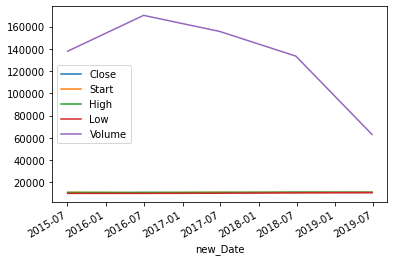

In [145]:
df.plot()